In [1]:
import seaborn as sns
import pickle, glob, os, json
import numpy as np
os.chdir('../')
import pandas as pd

       p(correct)  trial index conditionCI conditionHL
0           False            0           I           L
1            True            0           C           H
2           False            0           C           L
3           False            0           I           H
4           False            1           I           H
...           ...          ...         ...         ...
14330        True            8           I           L
14331        True            6           C           L
14332        True           14           I           H
14333        True            8           I           L
14334        True           13           C           H

[14335 rows x 4 columns]


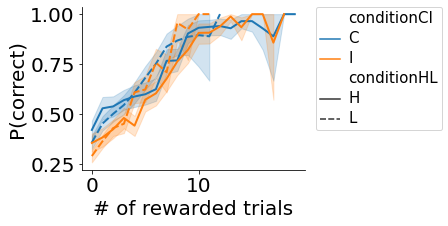

In [3]:
# Supplementary Fig. 3

import seaborn as sns
import pickle, json, glob, os
import numpy as np
import pandas as pd

def shownCond2trialByCond(shownCond, rewarded):
    n0 = 0
    n1 = 0
    n2 = 0
    n3 = 0
    idx = []
    for i, cond in enumerate(shownCond):
        if cond == 0:
            idx.append(n0)
            if rewarded[i]:
                n0 += 1
        elif cond == 1:
            idx.append(n1)
            if rewarded[i]:
                n1 += 1            
        elif cond == 2:
            idx.append(n2)
            if rewarded[i]:
                n2 += 1   
        elif cond == 3:
            idx.append(n3)
            if rewarded[i]:
                n3 += 1
    return idx

def shown_conds2txt(shown_conds):
    out = []
    for cond in shown_conds:
        if cond == 0:
            out.append("CH")
        elif cond == 1:
            out.append("IH")
        elif cond == 2:
            out.append("CL")
        else:
            out.append("IL")
    return out

highChosen = []
trialIdx = []
shownCond = []
for i, path in enumerate(list(glob.glob('./data/*'))):
    for day in range(2):
        for i in range(6):
            try:
                data = json.load(open(path + '/'+str(day+1)+'/sess'+str(i+1) +'_data_precise_rt.json', 'rb'))
            except:
                continue

            session = data["sessionInfo"][i]  # Assuming sessionInfo is a list in JSON
            shown_conds = session["shownCond"]  # Access shownCond key
            isDone = session["isDone"]  # Access isDone key

            # Get valid trial indices where isDone is True
            valid_indices = [i for i in range(len(isDone)) if isDone[i]]
            rewarded = [session["isWin"][i] for i in valid_indices]

            trialIdx += shownCond2trialByCond([shown_conds[i] for i in valid_indices], rewarded)
            shownCond += shown_conds2txt([shown_conds[i] for i in valid_indices])
            highChosen += [session["highChosen"][i] for i in valid_indices]
            
d = {'p(correct)': highChosen, 'trial index': trialIdx, 'conditionCI': [c[0] for c in shownCond], 'conditionHL': [c[1] for c in shownCond]}
d = pd.DataFrame(data=d)
print(d)
o = ["C", "I"]
o2 = ["H", "L"]

from matplotlib import rcParams
import matplotlib.pylab as plt

rcParams['figure.figsize'] = 4,3

ax = sns.lineplot(data=d, x="trial index", y="p(correct)", hue='conditionCI',
                 style='conditionHL', style_order=o2, hue_order=o, linewidth = 2)

#b.axes.set_title("Title",fontsize=50)
ax.set_xlabel("# of rewarded trials",fontsize=20)
ax.set_ylabel("P(correct)",fontsize=20)
ax.tick_params(labelsize=20)
sns.despine()

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='15') # for legend title

plt.show()

/Users/YiSangHyun/anaconda3/envs/py3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


              Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     p_diff 
No. Observations:      304         Method:                 REML   
No. Groups:            30          Scale:                  0.0332 
Min. group size:       7           Log-Likelihood:         53.3410
Max. group size:       13          Converged:              Yes    
Mean group size:       10.1                                       
------------------------------------------------------------------
                        Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------
Intercept                0.046    0.025  1.860 0.063 -0.002  0.094
trial_index             -0.012    0.005 -2.459 0.014 -0.022 -0.003
Group Var                0.007    0.016                           
Group x trial_index Cov -0.001    0.000                           
trial_index Var          0.000    0.001                           



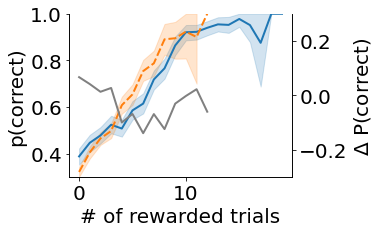

In [20]:
# Supplementary Fig. 3

import seaborn as sns
import pickle, json, glob, os
import numpy as np
import pandas as pd

def shownCond2trialByCond(shownCond, rewarded):
    n0 = 0
    n1 = 0
    n2 = 0
    n3 = 0
    idx = []
    for i, cond in enumerate(shownCond):
        if cond == 0:
            idx.append(n0)
            if rewarded[i]:
                n0 += 1
        elif cond == 1:
            idx.append(n1)
            if rewarded[i]:
                n1 += 1            
        elif cond == 2:
            idx.append(n2)
            if rewarded[i]:
                n2 += 1   
        elif cond == 3:
            idx.append(n3)
            if rewarded[i]:
                n3 += 1
    return idx

def shown_conds2txt(shown_conds):
    out = []
    for cond in shown_conds:
        if cond == 0:
            out.append("high")
        elif cond == 1:
            out.append("high")
        elif cond == 2:
            out.append("low")
        else:
            out.append("low")
    return out

highChosen = []
trialIdx = []
shownCond = []
rewarded_list = []
subj_list = []
for j, path in enumerate(list(glob.glob('./data/*'))):
    for day in range(2):
        for i in range(6):
            try:
                with open(f"{path}/{day+1}/sess{i+1}_data_precise_rt.json", 'r') as file:
                    data = json.load(file)  # Load JSON file
            except Exception as e:
                #print(f"Error loading {path}/{day+1}/sess{i+1}_data_precise_rt.json: {e}")
                continue

            session = data["sessionInfo"][i]  # Access session info
            shown_conds = session["shownCond"]  # Access shownCond key
            isDone = session["isDone"]  # Access isDone key

            # Get valid trial indices where isDone is True
            valid_indices = [idx for idx in range(len(isDone)) if isDone[idx]]
            rewarded = [session["isWin"][idx] for idx in valid_indices]

            trialIdx += shownCond2trialByCond([shown_conds[idx] for idx in valid_indices], rewarded)
            shownCond += shown_conds2txt([shown_conds[idx] for idx in valid_indices])
            highChosen += [session["highChosen"][idx] for idx in valid_indices]
            rewarded_list += rewarded
            subj_list += [j] * len(rewarded)
            
d = {'p(correct)': highChosen, 'trial index': trialIdx, 'condition': shownCond, 'rewarded': rewarded_list, 'subj':subj_list}
d = pd.DataFrame(data=d)
#d = d[d['rewarded']==1]
o = ["CH", "IH", "CL", "IL"]
o = ["high", "low"]

d_grouped = d.groupby(['trial index', 'condition', 'subj'], as_index=False)['p(correct)'].mean()
#print(d_grouped)
d2 = pd.DataFrame(data={})

p_diff = []
t_idx = []
subj = []
f1 = d_grouped['condition'] == 'high'
f2 = d_grouped['condition']=='low'
for i in range(21):
    for j in range(len(list(glob.glob('./data/*')))):
        try:
            p_c = d_grouped[f1&(d_grouped['trial index']==i)&(d_grouped['subj']==j)]['p(correct)']
            p_i = d_grouped[f2&(d_grouped['trial index']==i)&(d_grouped['subj']==j)]['p(correct)']
            p_diff.append(p_c.values[0] - p_i.values[0])
            t_idx.append(i)
            subj.append(j)
        except:
            continue

#f2 = ((d_grouped['trial index']!=20)| ((d_grouped['subj']>=80)|(d_grouped['subj']<70)))
#d2['p_diff'] = np.array(d_grouped[f1]['p(correct)']) - np.array(d_grouped[d_grouped['condition2']=='incongruent']['p(correct)'])
d2['p_diff'] = p_diff
d2['trial_index'] = t_idx
d2['subj'] = subj

import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.mixedlm('p_diff ~ trial_index', d2, groups=d2["subj"],
                   re_formula = '~ trial_index')
free = sm.regression.mixed_linear_model.MixedLMParams.from_components(
    np.ones(2), np.eye(2)
)
results = model.fit(method=["powell"], free=free)

print(results.summary())

d_grouped = d.groupby(['trial index', 'condition'], as_index=False)['p(correct)'].mean()
#print(d_grouped)
d2 = pd.DataFrame(data={})
#print(d_grouped[d_grouped['condition']=='high'])
#print(d_grouped[d_grouped['condition']=='low'])
d2['p_diff'] = np.array(d_grouped[d_grouped['condition']=='high']['p(correct)'])[:13] - np.array(d_grouped[d_grouped['condition']=='low']['p(correct)'])
d2['trial_index'] = np.array(d_grouped[d_grouped['condition']=='high']['trial index'])[:13]

from matplotlib import rcParams
import matplotlib.pylab as plt

rcParams['figure.figsize'] = 4,3

ax = sns.lineplot(data=d, x="trial index", y="p(correct)", hue='condition',
                 style='condition', style_order=o, hue_order=o, linewidth = 2, legend=False)

ax2 = ax.twinx()
ax2 = sns.lineplot(data=d2, x="trial_index", y="p_diff", linewidth = 2, color='gray', ax=ax2, legend=False, ci=None)
ax.set(ylim=(0.3, 1))
ax2.set(ylim=(-0.3, 0.3))
#b.axes.set_title("Title",fontsize=50)
ax.set_xlabel("# of rewarded trials",fontsize=20)
ax.set_ylabel("p(correct)",fontsize=20)
ax.tick_params(labelsize=20)


ax2.set_ylabel(r'$\Delta$ P(correct)',fontsize=20)
ax2.tick_params(labelsize=20)
sns.despine(right=False)

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
#plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
#plt.setp(ax.get_legend().get_title(), fontsize='15') # for legend title

plt.savefig('/Users/YiSangHyun/Downloads/learning_curves_rewarded_trial_fmri.svg', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

./data/32
./data/35
./data/33
./data/20
./data/18
./data/27
./data/11
./data/7
./data/29
./data/16
./data/6
./data/28
./data/17
./data/10
./data/19
./data/26
./data/8
./data/21
./data/36
./data/31
./data/30
./data/37
./data/24
./data/23
./data/15
./data/12
./data/13
./data/14
./data/22
./data/25


/Users/YiSangHyun/anaconda3/envs/py3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


              Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     p_diff 
No. Observations:      451         Method:                 REML   
No. Groups:            30          Scale:                  0.0362 
Min. group size:       9           Log-Likelihood:         74.9021
Max. group size:       19          Converged:              Yes    
Mean group size:       15.0                                       
------------------------------------------------------------------
                        Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------
Intercept                0.113    0.035  3.215 0.001  0.044  0.181
trial_index             -0.009    0.003 -2.969 0.003 -0.015 -0.003
Group Var                0.028    0.016                           
Group x trial_index Cov -0.002    0.000                           
trial_index Var          0.000    0.000                           



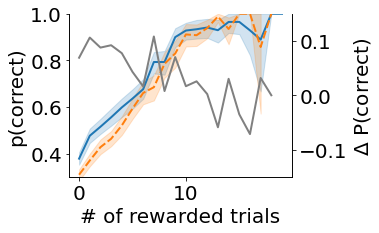

In [23]:
# Fig. 2

import seaborn as sns
import pickle, json, glob, os
import numpy as np
import pandas as pd

def shownCond2trialByCond(shownCond, rewarded):
    n0 = 0
    n1 = 0
    n2 = 0
    n3 = 0
    idx = []
    for i, cond in enumerate(shownCond):
        if cond == 0:
            idx.append(n0)
            if rewarded[i]:
                n0 += 1
        elif cond == 1:
            idx.append(n1)
            if rewarded[i]:
                n1 += 1            
        elif cond == 2:
            idx.append(n2)
            if rewarded[i]:
                n2 += 1   
        elif cond == 3:
            idx.append(n3)
            if rewarded[i]:
                n3 += 1
    return idx

def shown_conds2txt(shown_conds):
    out = []
    for cond in shown_conds:
        if cond == 0:
            out.append("congruent")
        elif cond == 1:
            out.append("incongruent")
        elif cond == 2:
            out.append("congruent")
        else:
            out.append("incongruent")
    return out

highChosen = []
trialIdx = []
shownCond = []
rewarded_list = []
subj_list = []
for j, path in enumerate(list(glob.glob('./data/*'))):
    print(path)
    for day in range(2):
        for i in range(6):
            try:
                with open(f"{path}/{day+1}/sess{i+1}_data_precise_rt.json", 'r') as file:
                    data = json.load(file)  # Load JSON file
            except Exception as e:
                #print(f"Error loading {path}/{day+1}/sess{i+1}_data_precise_rt.json: {e}")
                continue

            session = data["sessionInfo"][i]  # Access session info
            shown_conds = session["shownCond"]
            isDone = session["isDone"]
            rewarded = [session["isWin"][idx] for idx, done in enumerate(isDone) if done]
            
            trialIdx += shownCond2trialByCond([shown_conds[idx] for idx, done in enumerate(isDone) if done], rewarded)
            shownCond += shown_conds2txt([shown_conds[idx] for idx, done in enumerate(isDone) if done])
            highChosen += [session["highChosen"][idx] for idx, done in enumerate(isDone) if done]
            rewarded_list += rewarded
            subj_list += [j] * len(rewarded)

            
d = {'p(correct)': highChosen, 'trial index': trialIdx, 'condition': shownCond, 'rewarded': rewarded_list, 'subj':subj_list}
d = pd.DataFrame(data=d)

o = ["CH", "IH", "CL", "IL"]
o = ["congruent", "incongruent"]

d_grouped = d.groupby(['trial index', 'condition', 'subj'], as_index=False)['p(correct)'].mean()

d2 = pd.DataFrame(data={})

p_diff = []
t_idx = []
subj = []
f1 = d_grouped['condition'] == 'congruent'
f2 = d_grouped['condition']=='incongruent'
for i in range(21):
    for j in range(len(list(glob.glob('./data/*')))):
        try:
            p_c = d_grouped[f1&(d_grouped['trial index']==i)&(d_grouped['subj']==j)]['p(correct)']
            p_i = d_grouped[f2&(d_grouped['trial index']==i)&(d_grouped['subj']==j)]['p(correct)']
            p_diff.append(p_c.values[0] - p_i.values[0])
            t_idx.append(i)
            subj.append(j)
        except:
            continue

d2['p_diff'] = p_diff
d2['trial_index'] = t_idx
d2['subj'] = subj

import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.mixedlm('p_diff ~ trial_index', d2, groups=d2["subj"],
                   re_formula = '~ trial_index')
free = sm.regression.mixed_linear_model.MixedLMParams.from_components(
    np.ones(2), np.eye(2)
)
results = model.fit(method=["powell"], free=free)

print(results.summary())

d_grouped = d.groupby(['trial index', 'condition'], as_index=False)['p(correct)'].mean()

d2 = pd.DataFrame(data={})
d2['p_diff'] = np.array(d_grouped[d_grouped['condition']=='congruent']['p(correct)'])[:-1] - np.array(d_grouped[d_grouped['condition']=='incongruent']['p(correct)'])
d2['trial_index'] = np.array(d_grouped[d_grouped['condition']=='congruent']['trial index'])[:-1]

from matplotlib import rcParams
import matplotlib.pylab as plt

rcParams['figure.figsize'] = 4,3

ax = sns.lineplot(data=d, x="trial index", y="p(correct)", hue='condition',
                 style='condition', style_order=o, hue_order=o, linewidth = 2, legend=False)

ax2 = ax.twinx()
ax2 = sns.lineplot(data=d2, x="trial_index", y="p_diff", linewidth = 2, color='gray', ax=ax2, legend=False, ci=None)
ax.set(ylim=(0.3, 1))
ax2.set(ylim=(-0.15, 0.15))
#b.axes.set_title("Title",fontsize=50)
ax.set_xlabel("# of rewarded trials",fontsize=20)
ax.set_ylabel("p(correct)",fontsize=20)
ax.tick_params(labelsize=20)


ax2.set_ylabel(r'$\Delta$ P(correct)',fontsize=20)
ax2.tick_params(labelsize=20)
sns.despine(right=False)

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
#plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
#plt.setp(ax.get_legend().get_title(), fontsize='15') # for legend title

plt.savefig('/Users/YiSangHyun/Downloads/learning_curves_rewarded_trial.svg', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

./data/32
./data/35
./data/33
./data/20
./data/18
./data/27
./data/11
./data/7
./data/29
./data/16
./data/6
./data/28
./data/17
./data/10
./data/19
./data/26
./data/8
./data/21
./data/36
./data/31
./data/30
./data/37
./data/24
./data/23
./data/15
./data/12
./data/13
./data/14
./data/22
./data/25


/Users/YiSangHyun/anaconda3/envs/py3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


              Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     p_diff  
No. Observations:     630         Method:                 REML    
No. Groups:           30          Scale:                  0.0310  
Min. group size:      21          Log-Likelihood:         141.5887
Max. group size:      21          Converged:              Yes     
Mean group size:      21.0                                        
------------------------------------------------------------------
                        Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------
Intercept                0.137    0.034  4.049 0.000  0.071  0.204
trial_index             -0.005    0.002 -2.939 0.003 -0.008 -0.002
Group Var                0.029    0.039                           
Group x trial_index Cov -0.000    0.000                           
trial_index Var          0.000    0.000                           



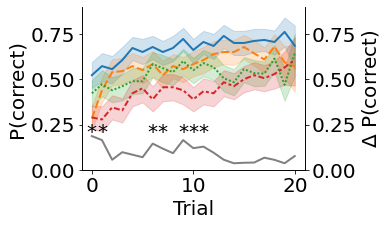

In [35]:
# Fig. 2

import seaborn as sns
import pickle, json, glob, os
import numpy as np
import pandas as pd


def shownCond2trialByCond(shownCond):
    n0 = 0
    n1 = 0
    n2 = 0
    n3 = 0
    idx = []
    for cond in shownCond:
        if cond == 0:
            idx.append(n0)
            n0 += 1
        elif cond == 1:
            idx.append(n1)
            n1 += 1            
        elif cond == 2:
            idx.append(n2)
            n2 += 1   
        elif cond == 3:
            idx.append(n3)
            n3 += 1
    return idx

def shown_conds2txt(shown_conds):
    out = []
    for cond in shown_conds:
        if cond == 0:
            out.append("CH")
        elif cond == 1:
            out.append("IH")
        elif cond == 2:
            out.append("CL")
        else:
            out.append("IL")
    return out

def shown_conds2txt2(shown_conds):
    out = []
    for cond in shown_conds:
        if cond == 0:
            out.append("C")
        elif cond == 1:
            out.append("I")
        elif cond == 2:
            out.append("C")
        else:
            out.append("I")
    return out

def draw_pval_line(pval_list, y_loc):
    pval_list1 = [pval<0.05/len(pval_list) for pval in pval_list]
    pval_list2 = [pval<0.05 for pval in pval_list]
    for i, pval in enumerate(pval_list1):
        if pval:
            #plt.plot([max(i-0.5,0), min(i+0.5, len(pval_list)-1)], [y_loc, y_loc], 'k', linewidth=1.5)
            fs=20
            plt.text(i-fs/40, y_loc, '*', fontsize=fs)
        #elif pval_list2[i]:
        #    fs=20
        #    plt.text(i-fs/70, y_loc+0.05, '.', fontsize=fs)  
            
highChosen = []
trialIdx = []
shownCond = []
shownCond2 = []
subjIdx = []
for j, path in enumerate(list(glob.glob('./data/*'))):
    print(path)
    for day in range(2):
        for i in range(6):
            try:
                with open(f"{path}/{day+1}/sess{i+1}_data_precise_rt.json", 'r') as file:
                    data = json.load(file)  # Load JSON file
            except Exception as e:
                #print(f"Error loading {path}/{day+1}/sess{i+1}_data_precise_rt.json: {e}")
                continue

            session = data["sessionInfo"][i]  # Access session info
            shown_conds = session["shownCond"]  # Access shownCond key
            isDone = session["isDone"]  # Access isDone key

            # Get valid trial indices where isDone is True
            valid_indices = [idx for idx in range(len(isDone)) if isDone[idx]]

            trialIdx += shownCond2trialByCond([shown_conds[idx] for idx in valid_indices])
            shownCond += shown_conds2txt([shown_conds[idx] for idx in valid_indices])
            shownCond2 += shown_conds2txt2([shown_conds[idx] for idx in valid_indices])
            highChosen += [session["highChosen"][idx] for idx in valid_indices]
            subjIdx += [j] * len(valid_indices)
            
d = {'p(correct)': highChosen, 'trial index': trialIdx, 'condition': shownCond, 'condition2':shownCond2, 'subj':subjIdx}
d = pd.DataFrame(data=d)
o = ["CH", "IH", "CL", "IL"]

d_grouped = d.groupby(['trial index', 'condition2', 'subj'], as_index=False)['p(correct)'].mean()
#print(d_grouped)
d2 = pd.DataFrame(data={})

p_diff = []
t_idx = []
subj = []
f1 = d_grouped['condition2'] == 'C'
f2 = d_grouped['condition2']=='I'
for i in range(21):
    for j in range(len(list(glob.glob('./data/*')))):
        try:
            p_c = d_grouped[f1&(d_grouped['trial index']==i)&(d_grouped['subj']==j)]['p(correct)']
            p_i = d_grouped[f2&(d_grouped['trial index']==i)&(d_grouped['subj']==j)]['p(correct)']
            p_diff.append(p_c.values[0] - p_i.values[0])
            t_idx.append(i)
            subj.append(j)
        except:
            continue

#f2 = ((d_grouped['trial index']!=20)| ((d_grouped['subj']>=80)|(d_grouped['subj']<70)))
#d2['p_diff'] = np.array(d_grouped[f1]['p(correct)']) - np.array(d_grouped[d_grouped['condition2']=='incongruent']['p(correct)'])
d2['p_diff'] = p_diff
d2['trial_index'] = t_idx
d2['subj'] = subj

import statsmodels.api as sm
import statsmodels.formula.api as smf

#model = smf.ols(formula='p_diff ~ trial_index', data=d2)
#results = model.fit()

model = smf.mixedlm('p_diff ~ trial_index', d2, groups=d2["subj"],
                   re_formula = '~ trial_index')
free = sm.regression.mixed_linear_model.MixedLMParams.from_components(
    np.ones(2), np.eye(2)
)
results = model.fit(method=["powell"], free=free)

print(results.summary())

#d_grouped = d.groupby(['trial index', 'condition2'], as_index=False)['p(correct)'].mean()
d_grouped = d.groupby(['trial index', 'condition2'], as_index=False)['p(correct)'].mean()
#print(d_grouped)
d2 = pd.DataFrame(data={})

d2['p_diff'] = np.array(d_grouped[d_grouped['condition2']=='C']['p(correct)']) - np.array(d_grouped[d_grouped['condition2']=='I']['p(correct)'])
d2['trial_index'] = np.array(d_grouped[d_grouped['condition2']=='C']['trial index'])

from matplotlib import rcParams
import matplotlib.pylab as plt

# Run the next cell for the p values
pval_list = [0.0, 0.0, 0.1362, 0.0076, 0.0232, 0.0656, 0.0, 0.0006, 0.013, 0.0, 0.0014, 0.0002, 0.0106, 0.1328, 0.3352, 0.2748, 0.2708, 0.0692, 0.1386, 0.436, 0.2342]
rcParams['figure.figsize'] = 4,3

ax = sns.lineplot(data=d, x="trial index", y="p(correct)", hue='condition',
                 style='condition', style_order=o, hue_order=o, linewidth = 2, legend=False)
draw_pval_line(pval_list, 0.18)
ax2 = ax.twinx()
ax2 = sns.lineplot(data=d2, x="trial_index", y="p_diff", linewidth = 2, color='gray', ax=ax2, legend=False, ci=None)
ax.set(ylim=(0.0, 0.9))
ax2.set(ylim=(0.0, 0.9))

ax.set_xlabel("Trial",fontsize=20)
ax.set_ylabel("P(correct)",fontsize=20)
ax.tick_params(labelsize=20)

ax2.set_ylabel(r'$\Delta$ P(correct)',fontsize=20)
ax2.tick_params(labelsize=20)
sns.despine(right=False)

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
#plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
#plt.setp(ax.get_legend().get_title(), fontsize='15') # for legend title

plt.savefig('/Users/YiSangHyun/Downloads/learning_curves_fmri.svg', dpi=300, bbox_inches='tight', transparent=True)
#plt.savefig('../dataAnalysis/figures/learning_curves.svg', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

./data/32
Error loading ./data/32/2/sess1_data_precise_rt.json: [Errno 2] No such file or directory: './data/32/2/sess1_data_precise_rt.json'
Error loading ./data/32/2/sess2_data_precise_rt.json: [Errno 2] No such file or directory: './data/32/2/sess2_data_precise_rt.json'
Error loading ./data/32/2/sess3_data_precise_rt.json: [Errno 2] No such file or directory: './data/32/2/sess3_data_precise_rt.json'
Error loading ./data/32/2/sess4_data_precise_rt.json: [Errno 2] No such file or directory: './data/32/2/sess4_data_precise_rt.json'
Error loading ./data/32/2/sess5_data_precise_rt.json: [Errno 2] No such file or directory: './data/32/2/sess5_data_precise_rt.json'
Error loading ./data/32/2/sess6_data_precise_rt.json: [Errno 2] No such file or directory: './data/32/2/sess6_data_precise_rt.json'
./data/35
Error loading ./data/35/2/sess1_data_precise_rt.json: [Errno 2] No such file or directory: './data/35/2/sess1_data_precise_rt.json'
Error loading ./data/35/2/sess2_data_precise_rt.json: [E

Error loading ./data/28/2/sess1_data_precise_rt.json: [Errno 2] No such file or directory: './data/28/2/sess1_data_precise_rt.json'
Error loading ./data/28/2/sess2_data_precise_rt.json: [Errno 2] No such file or directory: './data/28/2/sess2_data_precise_rt.json'
Error loading ./data/28/2/sess3_data_precise_rt.json: [Errno 2] No such file or directory: './data/28/2/sess3_data_precise_rt.json'
Error loading ./data/28/2/sess4_data_precise_rt.json: [Errno 2] No such file or directory: './data/28/2/sess4_data_precise_rt.json'
Error loading ./data/28/2/sess5_data_precise_rt.json: [Errno 2] No such file or directory: './data/28/2/sess5_data_precise_rt.json'
Error loading ./data/28/2/sess6_data_precise_rt.json: [Errno 2] No such file or directory: './data/28/2/sess6_data_precise_rt.json'
./data/17
Error loading ./data/17/2/sess1_data_precise_rt.json: [Errno 2] No such file or directory: './data/17/2/sess1_data_precise_rt.json'
Error loading ./data/17/2/sess2_data_precise_rt.json: [Errno 2] No

Error loading ./data/23/2/sess1_data_precise_rt.json: [Errno 2] No such file or directory: './data/23/2/sess1_data_precise_rt.json'
Error loading ./data/23/2/sess2_data_precise_rt.json: [Errno 2] No such file or directory: './data/23/2/sess2_data_precise_rt.json'
Error loading ./data/23/2/sess3_data_precise_rt.json: [Errno 2] No such file or directory: './data/23/2/sess3_data_precise_rt.json'
Error loading ./data/23/2/sess4_data_precise_rt.json: [Errno 2] No such file or directory: './data/23/2/sess4_data_precise_rt.json'
Error loading ./data/23/2/sess5_data_precise_rt.json: [Errno 2] No such file or directory: './data/23/2/sess5_data_precise_rt.json'
Error loading ./data/23/2/sess6_data_precise_rt.json: [Errno 2] No such file or directory: './data/23/2/sess6_data_precise_rt.json'
./data/15
Error loading ./data/15/2/sess1_data_precise_rt.json: [Errno 2] No such file or directory: './data/15/2/sess1_data_precise_rt.json'
Error loading ./data/15/2/sess2_data_precise_rt.json: [Errno 2] No

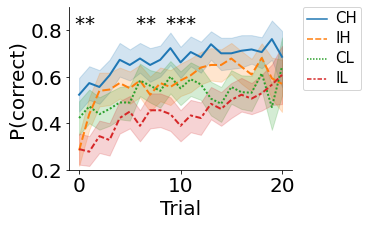

In [31]:
# Fig. 2

import seaborn as sns
import pickle, json, glob, os
import numpy as np
import pandas as pd
from scipy.stats import ttest_rel
from statsmodels.stats.proportion import proportions_ztest
import copy
np.random.seed(0)

def shownCond2trialByCond(shownCond):
    n0 = 0
    n1 = 0
    n2 = 0
    n3 = 0
    idx = []
    for cond in shownCond:
        if cond == 0:
            idx.append(n0)
            n0 += 1
        elif cond == 1:
            idx.append(n1)
            n1 += 1            
        elif cond == 2:
            idx.append(n2)
            n2 += 1   
        elif cond == 3:
            idx.append(n3)
            n3 += 1
    return idx

def shown_conds2txt(shown_conds):
    out = []
    for cond in shown_conds:
        if cond == 0:
            out.append("CH")
        elif cond == 1:
            out.append("IH")
        elif cond == 2:
            out.append("CL")
        else:
            out.append("IL")
    return out

def shown_conds2txt2(shown_conds):
    out = []
    for cond in shown_conds:
        if cond == 0:
            out.append("C")
        elif cond == 1:
            out.append("I")
        elif cond == 2:
            out.append("C")
        else:
            out.append("I")
    return out

def draw_pval_line(pval_list, y_loc):
    pval_list = [pval<0.05/len(pval_list) for pval in pval_list]
    #pval_list = [pval<0.05 for pval in pval_list]
    for i, pval in enumerate(pval_list):
        if pval:
            #plt.plot([max(i-0.5,0), min(i+0.5, len(pval_list)-1)], [y_loc, y_loc], 'k', linewidth=1.5)
            fs=20
            plt.text(i-fs/40, y_loc, '*', fontsize=fs)
            
highChosen = []
trialIdx = []
shownCond = []
shownCond2 = []
subjIdx = []
for path in list(glob.glob('./data/*')):
    print(path)
    for day in range(2):
        for i in range(6):
            try:
                with open(f"{path}/{day+1}/sess{i+1}_data_precise_rt.json", 'r') as file:
                    data = json.load(file)  # Load JSON file
            except Exception as e:
                #print(f"Error loading {path}/{day+1}/sess{i+1}_data_precise_rt.json: {e}")
                continue

            session = data["sessionInfo"][i]  # Access session info
            shown_conds = session["shownCond"]  # Access shownCond key
            isDone = session["isDone"]  # Access isDone key

            # Get valid trial indices where isDone is True
            valid_indices = [idx for idx in range(len(isDone)) if isDone[idx]]

            trialIdx += shownCond2trialByCond([shown_conds[idx] for idx in valid_indices])
            shownCond += shown_conds2txt([shown_conds[idx] for idx in valid_indices])
            shownCond2 += shown_conds2txt2([shown_conds[idx] for idx in valid_indices])
            highChosen += [session["highChosen"][idx] for idx in valid_indices]
            subjIdx += [path] * len(valid_indices)  # Assign subject index
            
d = {'p(correct)': highChosen, 'trial index': trialIdx, 'condition': shownCond, 'condition2': shownCond2, 'subject index':subjIdx}
d = pd.DataFrame(data=d)
o = ["CH", "IH", "CL", "IL"]

d4perm = copy.deepcopy(d)

pval_list = []
for i in range(21):
    cong_p = d[(d['trial index']==i)&(d['condition2']=='C')]['p(correct)'].mean()
    incong_p = d[(d['trial index']==i)&(d['condition2']=='I')]['p(correct)'].mean()

    true_diff = cong_p - incong_p
    perm_list = []
    for _ in range(5000):
        d4perm['condition2'] = d4perm.groupby('subject index')['condition2'].transform(lambda x: np.random.permutation(x))
        cong_p_perm = d4perm[(d4perm['trial index']==i)&(d4perm['condition2']=='C')]['p(correct)'].mean()
        incong_p_perm = d4perm[(d4perm['trial index']==i)&(d4perm['condition2']=='I')]['p(correct)'].mean()
        perm_list.append(abs(cong_p_perm-incong_p_perm))
    pval = np.mean(np.array(perm_list) > true_diff)

    pval_list.append(pval)

print(pval_list)
    
from matplotlib import rcParams
import matplotlib.pylab as plt

rcParams['figure.figsize'] = 4,3

ax = sns.lineplot(data=d, x="trial index", y="p(correct)", hue='condition',
                 style='condition', style_order=o, hue_order=o, linewidth = 2)
draw_pval_line(pval_list, 0.8)
ax.set(ylim=(0.2, 0.9))
#b.axes.set_title("Title",fontsize=50)
ax.set_xlabel("Trial",fontsize=20)
ax.set_ylabel("P(correct)",fontsize=20)
ax.tick_params(labelsize=20)
sns.despine()

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='15') # for legend title

plt.savefig('/Users/YiSangHyun/Downloads/learning_curves.svg', dpi=300, bbox_inches='tight', transparent=True)
#plt.savefig('../dataAnalysis/figures/learning_curves.svg', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

   subject index shown condition  p(affordance)
0      ./data/10             All       0.250000
1      ./data/11             All       0.416667
2      ./data/12             All       0.333333
3      ./data/13             All       0.708333
4      ./data/14             All       0.458333
5      ./data/15             All       0.416667
6      ./data/16             All       0.708333
7      ./data/17             All       0.583333
8      ./data/18             All       0.416667
9      ./data/19             All       0.291667
10     ./data/20             All       0.500000
11     ./data/21             All       0.500000
12     ./data/22             All       0.291667
13     ./data/23             All       0.375000
14     ./data/24             All       0.583333
15     ./data/25             All       0.625000
16     ./data/26             All       0.541667
17     ./data/27             All       0.500000
18     ./data/28             All       0.583333
19     ./data/29             All       0

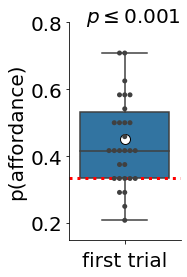

In [36]:
# Fig. 2

import seaborn as sns
from statannot import add_stat_annotation
import pickle, json, glob, os
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

def shownCond2trialByCond(shownCond):
    n0 = 0
    n1 = 0
    n2 = 0
    n3 = 0
    idx = []
    for cond in shownCond:
        if cond == 0:
            idx.append(n0)
            n0 += 1
        elif cond == 1:
            idx.append(n1)
            n1 += 1            
        elif cond == 2:
            idx.append(n2)
            n2 += 1   
        elif cond == 3:
            idx.append(n3)
            n3 += 1
    return idx

def shown_conds2txt(shown_conds):
    out = []
    for cond in shown_conds:
        if cond == 0:
            out.append("All")
        elif cond == 1:
            out.append("All")
        elif cond == 2:
            out.append("All")
        else:
            out.append("All")
    return out
def stim2code(stim):
    if "Pinch" in stim:
        return 0
    elif "Clench" in stim:
        return 1
    elif "Poke" in stim:
        return 2
    else:
        return 3
    
def stim_array2code(stim_array):
    stim_list = stim_array
    code_list = [stim2code(stim) for stim in stim_list]
    return np.array(code_list)

def p2text(p):
    text = ""
    if p > 0.05:
        text = "n.s., p=" + str(round(p,3))
    elif p > 0.01:
        text = "*, p=" + str(round(p,3))
    elif p > 0.001:
        text = "**, p=" + str(round(p,3))
    elif p > 0.0001:
        text = "***, p=" + str(round(p,3))
    else:
        text = "****, p=" + str(round(p,3))
    return text

def p2text(p):
    text = ""
    if p > 0.05:
        text = "n.s."
    elif p > 0.01:
        text = r'$p \leq 0.05$'
    elif p > 0.001:
        text = r'$p \leq 0.01$'
    elif p > 0.0001:
        text = r'$p \leq 0.001$'
    else:
        text = r'$p \leq 0.0001$'
    return text

highChosen = []
trialIdx = []
subjIdx = []
shownCond = []
for path in list(glob.glob('./data/*')):
    for day in range(2):
        for i in range(6):
            try:
                with open(f"{path}/{day+1}/sess{i+1}_data_precise_rt.json", 'r') as file:
                    data = json.load(file)  # Load JSON file
            except Exception as e:
                #print(f"Error loading {path}/{day+1}/sess{i+1}_data_precise_rt.json: {e}")
                continue

            session = data["sessionInfo"][i]  # Access session info
            shown_conds = session["shownCond"]  # Access shownCond key
            isDone = session["isDone"]  # Access isDone key

            conds = [shown_conds[i] for i in range(len(isDone)) if isDone[i]]  # Filtered conditions
            try:
                i0, i1, i2, i3 = conds.index(0), conds.index(1), conds.index(2), conds.index(3)
            except ValueError as e:
                print(f"Missing expected conditions in {path}/{day+1}: {e}")
                continue  # Skip if any expected condition is missing

            trialIdx += shownCond2trialByCond(conds)
            shownCond += [shown_conds2txt(conds)[i0],
                          shown_conds2txt(conds)[i1],
                          shown_conds2txt(conds)[i2],
                          shown_conds2txt(conds)[i3]]

            shownStim = stim_array2code(session["shownStim"])  # Convert stim array to code
            selectedMov = session["selectedMov"]  # Extract selected movements
            affChosen = [(shownStim[i] == selectedMov[i]) for i in range(len(isDone)) if isDone[i]]

            highChosen += [affChosen[i0], affChosen[i1], affChosen[i2], affChosen[i3]]
            subjIdx += [path] * 4  # Assign subject index
d = {'p(affordance)': highChosen, 'shown condition': shownCond, 'subject index':subjIdx}
d = pd.DataFrame(data=d)
d = d.groupby(['subject index', 'shown condition'], as_index=False)['p(affordance)'].mean()
print(d)
o = ["All"]

from matplotlib import rcParams
import matplotlib.pylab as plt

rcParams['figure.figsize'] = 2,4

ax = sns.boxplot(data=d, y="p(affordance)", showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
ax = sns.swarmplot(data=d, y="p(affordance)", color=".25", ax=ax)
plt.plot([-1/2, 1/2], [1/3, 1/3], linewidth=3, color='red', linestyle=':')
ax.set(ylim=(0.15, 0.8))
result = stats.ttest_1samp(d["p(affordance)"], 1/3)
print(result)
text = p2text(result[1])
#graph.plot([0, 1], [0.75, 0.75], c="black")
h = 0.0
ax.text(0.-len(text)/40., 0.80+h, text, fontsize=20)
#ax.set_title("First trial")

ax.set_xlabel("first trial",fontsize=20)
ax.set_ylabel("p(affordance)",fontsize=20)
ax.tick_params(labelsize=20)
sns.despine()

plt.savefig('/Users/YiSangHyun/Downloads/first_trial.svg', dpi=300, bbox_inches='tight', transparent=True)
plt.show()



No handles with labels found to put in legend.


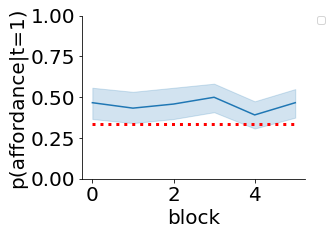

              Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   p_affordance
No. Observations:     180       Method:               REML        
No. Groups:           30        Scale:                0.0555      
Min. group size:      6         Log-Likelihood:       -13.0331    
Max. group size:      6         Converged:            Yes         
Mean group size:      6.0                                         
------------------------------------------------------------------
                        Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------
Intercept                0.459    0.037 12.380 0.000  0.386  0.531
block_index             -0.002    0.010 -0.232 0.817 -0.023  0.018
Group Var                0.012    0.000                           
Group x block_index Cov -0.000    0.000                           
block_index Var          0.000    0.000                           



/Users/YiSangHyun/anaconda3/envs/py3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [39]:
# Supplementary Fig. 2

import seaborn as sns
from statannot import add_stat_annotation
import pickle, json, glob, os
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

def shownCond2trialByCond(shownCond):
    n0 = 0
    n1 = 0
    n2 = 0
    n3 = 0
    idx = []
    for cond in shownCond:
        if cond == 0:
            idx.append(n0)
            n0 += 1
        elif cond == 1:
            idx.append(n1)
            n1 += 1            
        elif cond == 2:
            idx.append(n2)
            n2 += 1   
        elif cond == 3:
            idx.append(n3)
            n3 += 1
    return idx

def shown_conds2txt(shown_conds):
    out = []
    for cond in shown_conds:
        if cond == 0:
            out.append("All")
        elif cond == 1:
            out.append("All")
        elif cond == 2:
            out.append("All")
        else:
            out.append("All")
    return out
def stim2code(stim):
    if "Pinch" in stim:
        return 0
    elif "Clench" in stim:
        return 1
    elif "Poke" in stim:
        return 2
    else:
        return 3
    
def stim_array2code(stim_array):
    stim_list = stim_array
    code_list = [stim2code(stim) for stim in stim_list]
    return np.array(code_list)

def p2text(p):
    text = ""
    if p > 0.05:
        text = "n.s., p=" + str(round(p,3))
    elif p > 0.01:
        text = "*, p=" + str(round(p,3))
    elif p > 0.001:
        text = "**, p=" + str(round(p,3))
    elif p > 0.0001:
        text = "***, p=" + str(round(p,3))
    else:
        text = "****, p=" + str(round(p,3))
    return text

def p2text(p):
    text = ""
    if p > 0.05:
        text = "n.s."
    elif p > 0.01:
        text = r'$p \leq 0.05$'
    elif p > 0.001:
        text = r'$p \leq 0.01$'
    elif p > 0.0001:
        text = r'$p \leq 0.001$'
    else:
        text = r'$p \leq 0.0001$'
    return text

highChosen = []
trialIdx = []
subjIdx = []
shownCond = []
blockIdx = []
for path in list(glob.glob('./data/*')):
    for day in range(2):
        for i in range(6):
            try:
                with open(f"{path}/{day+1}/sess{i+1}_data_precise_rt.json", 'r') as file:
                    data = json.load(file)  # Load JSON file
            except Exception as e:
                #print(f"Error loading {path}/{day+1}/sess{i+1}_data_precise_rt.json: {e}")
                continue

            session = data["sessionInfo"][i]  # Access session info
            shown_conds = session["shownCond"]  # Access shownCond key
            isDone = session["isDone"]  # Access isDone key

            # Filtered conditions based on isDone
            conds = [shown_conds[j] for j in range(len(isDone)) if isDone[j]]  

            try:
                i0, i1, i2, i3 = conds.index(0), conds.index(1), conds.index(2), conds.index(3)
            except ValueError as e:
                print(f"Missing expected conditions in {path}/{day+1}: {e}")
                continue  # Skip if any expected condition is missing

            trialIdx += shownCond2trialByCond(conds)
            shownCond += [shown_conds2txt(conds)[i0],
                          shown_conds2txt(conds)[i1],
                          shown_conds2txt(conds)[i2],
                          shown_conds2txt(conds)[i3]]

            shownStim = stim_array2code(session["shownStim"])  # Convert stim array to code
            selectedMov = session["selectedMov"]  # Extract selected movements
            affChosen = [(shownStim[j] == selectedMov[j]) for j in range(len(isDone)) if isDone[j]]

            highChosen += [affChosen[i0], affChosen[i1], affChosen[i2], affChosen[i3]]
            subjIdx += [path] * 4  # Assign subject index
            blockIdx += [i] * 4  # Assign block index
            
d = {'p_affordance': highChosen, 'shown condition': shownCond, 'subject_index':subjIdx, 'block_index':blockIdx}
d = pd.DataFrame(data=d)
d = d.groupby(['subject_index', 'block_index'], as_index=False)['p_affordance'].mean()
#print(d)
#o = ["congruent high", "incongruent high", "congruent low", "incongruent low"]

from matplotlib import rcParams
import matplotlib.pylab as plt

rcParams['figure.figsize'] = 4,3

ax = sns.lineplot(data=d, x="block_index", y="p_affordance")
ax.set(ylim=(0, 1))
ax.set_xlabel("block",fontsize=20)
ax.set_ylabel("p(affordance|t=1)",fontsize=20)
ax.tick_params(labelsize=20)

sns.despine()

plt.plot([0, 5], [1/3, 1/3], linewidth=3, color='red', linestyle=':')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='15') # for legend title
plt.savefig('/Users/YiSangHyun/Downloads/paff2.svg', dpi=300, bbox_inches='tight', transparent=True)


plt.show()

import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.mixedlm('p_affordance ~ block_index', d, groups=d["subject_index"], re_formula = '~ block_index')
free = sm.regression.mixed_linear_model.MixedLMParams.from_components(
    np.ones(1), np.eye(1)
)
results = model.fit(method=["powell"], free=free)

print(results.summary())


incomp. v.s. comp.: t-test paired samples, P_val=6.162e-05 stat=4.680e+00


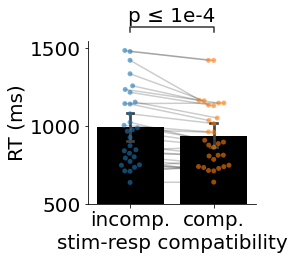

In [43]:
# Fig. 2

import seaborn as sns
from statannot import add_stat_annotation
import pickle, json, glob, os
import numpy as np
import pandas as pd


def shownCond2trialByCond(shownCond):
    n0 = 0
    n1 = 0
    n2 = 0
    n3 = 0
    idx = []
    for cond in shownCond:
        if cond == 0:
            idx.append(n0)
            n0 += 1
        elif cond == 1:
            idx.append(n1)
            n1 += 1            
        elif cond == 2:
            idx.append(n2)
            n2 += 1   
        elif cond == 3:
            idx.append(n3)
            n3 += 1
    return idx

def shown_conds2txt(shown_conds):
    out = []
    for cond in shown_conds:
        if cond == 0:
            out.append("congruent high")
        elif cond == 1:
            out.append("incongruent high")
        elif cond == 2:
            out.append("congruent low")
        else:
            out.append("incongruent low")
    return out

def stim2code(stim):
    if "Pinch" in stim:
        return 0
    elif "Clench" in stim:
        return 1
    elif "Poke" in stim:
        return 2
    else:
        return 3
    
def stim_array2code(stim_array):
    stim_list = stim_array
    code_list = [stim2code(stim) for stim in stim_list]
    return np.array(code_list)

def bin2txt(b):
    if b :
        txt = 'comp.'
    else:
        txt = 'incomp.'
    return txt

rts = []
affChosen_list = []
trialIdx = []
subjIdx = []
shownCond = []
for path in list(glob.glob('./data/*')):
    for day in range(2):
        for i in range(6):
            try:
                with open(f"{path}/{day+1}/sess{i+1}_data_precise_rt.json", 'r') as file:
                    data = json.load(file)  # Load JSON file
            except Exception as e:
                #print(f"Error loading {path}/{day+1}/sess{i+1}_data_precise_rt.json: {e}")
                continue

            session = data["sessionInfo"][i]  # Access session info
            shown_conds = session["shownCond"]  # Access shownCond key
            isDone = session["isDone"]  # Access isDone key

            trialIdx += shownCond2trialByCond([shown_conds[i] for i in range(len(isDone)) if isDone[i]])
            shownCond += shown_conds2txt([shown_conds[i] for i in range(len(isDone)) if isDone[i]])

            shownStim = stim_array2code(session["shownStim"])  # Convert stim array to code
            selectedMov = session["selectedMov"]  # Extract selected movements
            affChosen = [bin2txt(shownStim[i] == selectedMov[i]) for i in range(len(isDone)) if isDone[i]]

            rts += [session["sessionResponses"]["rt"][i]*1000 for i in range(len(isDone)) if isDone[i]]  # Reaction times
            subjIdx += [path] * sum(isDone)  # Assign subject index
            affChosen_list += affChosen  # Append affective choice results
            
d = {'congruent action': affChosen_list, 'rt': rts, 'trial index': trialIdx, 'condition': shownCond, 'subject index': subjIdx}
d = pd.DataFrame(data=d)
d = d.groupby(['subject index', 'congruent action'], as_index=False)['rt'].mean()
#print(d)
#sns.lineplot(data=d, x="trialIdx", y="rt", hue='shownCond')
o = ["False", "True"]
o = ["incomp.", "comp."]

from matplotlib import rcParams
import matplotlib.pylab as plt

rcParams['figure.figsize'] = 3,3

ax = sns.barplot(data=d, x="congruent action", y="rt", facecolor=(0, 0, 0), order=o, capsize=0.08)
ax = sns.swarmplot(data=d, x="congruent action", y="rt", order=o, alpha=0.6)

#============================================================
locs1 = ax.get_children()[0].get_offsets()
locs2 = ax.get_children()[1].get_offsets()
sort_idxs1 = np.argsort(d[d['congruent action']=='comp.']['rt'])
sort_idxs2 = np.argsort(d[d['congruent action']=='incomp.']['rt'])

locs2_sorted = locs2[sort_idxs2.argsort()][sort_idxs1]

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2_sorted[i, 0]]
    y = [locs1[i, 1], locs2_sorted[i, 1]]
    ax.plot(x, y, color="black", alpha=0.2)
#============================================================

test_results = add_stat_annotation(ax, data=d, x="congruent action", y="rt", order=o,
                               #box_pairs=[("True", "False")],
                               box_pairs=[("incomp.", "comp.")],
                               test='t-test_paired', text_format='simple',
                               loc='outside', comparisons_correction=None, verbose=4, fontsize=20)
#ax.set_title('Correlation')
plt.ylabel("RT (ms)", fontsize=20)
plt.xlabel("stim-resp compatibility", fontsize=20)
plt.tick_params(labelsize=20)
plt.ylim(500, 1550)
sns.despine()

plt.savefig('/Users/YiSangHyun/Downloads/rt_comparison_between_affordance_compatible_incompatible.svg', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

    subject index Stim-Resp Comp. Condition           rt
0       ./data/10           Comp.     Cong.   606.965483
1       ./data/10           Comp.   Incong.   672.491792
2       ./data/10         Incomp.     Cong.   635.759757
3       ./data/10         Incomp.   Incong.   639.238804
4       ./data/11           Comp.     Cong.   921.938191
..            ...             ...       ...          ...
115      ./data/7         Incomp.   Incong.  1227.005073
116      ./data/8           Comp.     Cong.   902.875536
117      ./data/8           Comp.   Incong.   889.766378
118      ./data/8         Incomp.     Cong.  1022.036840
119      ./data/8         Incomp.   Incong.   992.630134

[120 rows x 4 columns]
Incong._Comp. v.s. Incong._Incomp.: t-test paired samples, P_val=3.843e-02 stat=2.169e+00
Cong._Comp. v.s. Cong._Incomp.: t-test paired samples, P_val=2.271e-06 stat=-5.871e+00
Cong. v.s. Incong.: t-test paired samples, P_val=1.925e-01 stat=-1.318e+00


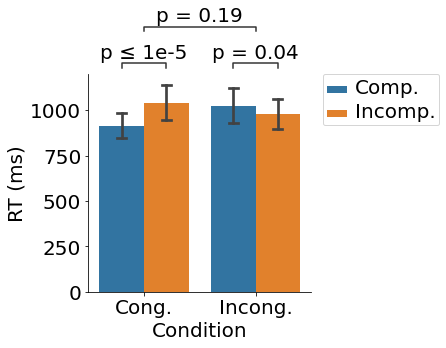

In [45]:
# Supplementary Fig. 1

import seaborn as sns
from statannot import add_stat_annotation
import pickle, json, glob, os
import numpy as np
import pandas as pd


def shownCond2trialByCond(shownCond):
    n0 = 0
    n1 = 0
    n2 = 0
    n3 = 0
    idx = []
    for cond in shownCond:
        if cond == 0:
            idx.append(n0)
            n0 += 1
        elif cond == 1:
            idx.append(n1)
            n1 += 1            
        elif cond == 2:
            idx.append(n2)
            n2 += 1   
        elif cond == 3:
            idx.append(n3)
            n3 += 1
    return idx

def shown_conds2txt(shown_conds):
    out = []
    for cond in shown_conds:
        if cond == 0:
            out.append("Cong.")# high")
        elif cond == 1:
            out.append("Incong.")# high")
        elif cond == 2:
            out.append("Cong.")# low")
        else:
            out.append("Incong.")# low")
    return out

def stim2code(stim):
    if "Pinch" in stim:
        return 0
    elif "Clench" in stim:
        return 1
    elif "Poke" in stim:
        return 2
    else:
        return 3
    
def stim_array2code(stim_array):
    stim_list = stim_array
    code_list = [stim2code(stim) for stim in stim_list]
    return np.array(code_list)

def bin2txt(b):
    if b :
        txt = 'Comp.'
    else:
        txt = 'Incomp.'
    return txt

rts = []
affChosen_list = []
trialIdx = []
subjIdx = []
shownCond = []
for path in list(glob.glob('./data/*')):
    for day in range(2):
        for i in range(6):
            try:
                with open(f"{path}/{day+1}/sess{i+1}_data_precise_rt.json", 'r') as file:
                    data = json.load(file)  # Load JSON file
            except Exception as e:
                #print(f"Error loading {path}/{day+1}/sess{i+1}_data_precise_rt.json: {e}")
                continue

            session = data["sessionInfo"][i]  # Access session info
            shown_conds = session["shownCond"]  # Access shownCond key
            isDone = session["isDone"]  # Access isDone key

            filtered_indices = [i for i in range(len(isDone)) if isDone[i]]

            trialIdx += shownCond2trialByCond([shown_conds[i] for i in filtered_indices])
            shownCond += shown_conds2txt([shown_conds[i] for i in filtered_indices])

            shownStim = stim_array2code(session["shownStim"])  # Convert stim array to code
            selectedMov = session["selectedMov"]  # Extract selected movements
            affChosen = [bin2txt(shownStim[i] == selectedMov[i]) for i in filtered_indices]

            rts += [session["sessionResponses"]["rt"][i]*1000 for i in filtered_indices]  # Extract reaction times
            subjIdx += [path] * len(filtered_indices)  # Assign subject index
            affChosen_list += affChosen  
            
d = {'Stim-Resp Comp.': affChosen_list, 'rt': rts, 'trial index': trialIdx, 'Condition': shownCond, 'subject index': subjIdx}
d = pd.DataFrame(data=d)
d = d.groupby(['subject index', 'Stim-Resp Comp.', 'Condition'], as_index=False)['rt'].mean()
print(d)
#sns.lineplot(data=d, x="trialIdx", y="rt", hue='shownCond')
o = ["Comp.", "Incomp."]
o_cond = ['Cong.', 'Incong.']

from matplotlib import rcParams
import matplotlib.pylab as plt

rcParams['figure.figsize'] = 4,4

ax = sns.barplot(data=d, x="Condition", y="rt", hue="Stim-Resp Comp.", order=o_cond, hue_order=o, capsize=0.08)

test_results = add_stat_annotation(ax, data=d, x="Condition", y="rt", hue="Stim-Resp Comp.", order=o_cond, hue_order=o,
                               box_pairs=[(("Cong.", "Comp."), ("Cong.", "Incomp.")),
                                          (("Incong.", "Comp."), ("Incong.", "Incomp.")),
                                          #(("Cong.", "Comp."), ("Incong.", "Comp.")),
                                          #(("Cong.", "Incomp."), ("Incong.", "Incomp.")),
                                         ],
                               test='t-test_paired', text_format='simple',
                               loc='outside', comparisons_correction=None, verbose=4, fontsize=20)
test_results = add_stat_annotation(ax, data=d, x="Condition", y="rt", order=o_cond, hue_order=o,
                               box_pairs=[(("Cong.", "Incong."))
                                         ],
                               test='t-test_paired', text_format='simple',
                               loc='outside', comparisons_correction=None, verbose=4, fontsize=20, line_offset=0.2)


#ax.set_title('Correlation')
plt.ylabel("RT (ms)", fontsize=20)
plt.xlabel("Condition", fontsize=20)
plt.tick_params(labelsize=20)
#plt.ylim(500, 1400)
sns.despine()

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
plt.setp(ax.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='20') # for legend title

plt.savefig('/Users/YiSangHyun/Downloads/rt_by_cond.svg', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

    subject index Stim-Resp Comp. Condition           rt
0       ./data/10           Comp.      High   631.156892
1       ./data/10           Comp.       Low   645.708925
2       ./data/10         Incomp.      High   625.346013
3       ./data/10         Incomp.       Low   651.785872
4       ./data/11           Comp.      High   917.143886
..            ...             ...       ...          ...
115      ./data/7         Incomp.       Low  1280.009856
116      ./data/8           Comp.      High   870.535426
117      ./data/8           Comp.       Low   925.626111
118      ./data/8         Incomp.      High   945.725663
119      ./data/8         Incomp.       Low  1061.918127

[120 rows x 4 columns]
Low_Comp. v.s. Low_Incomp.: t-test paired samples, P_val=4.651e-03 stat=-3.067e+00
High_Comp. v.s. High_Incomp.: t-test paired samples, P_val=4.061e-04 stat=-3.994e+00
High v.s. Low: t-test paired samples, P_val=2.634e-10 stat=-7.597e+00


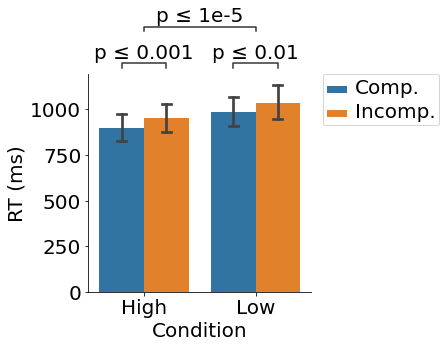

In [46]:
# Supplementary Fig. 1

import seaborn as sns
from statannot import add_stat_annotation
import pickle, json, glob, os
import numpy as np
import pandas as pd


def shownCond2trialByCond(shownCond):
    n0 = 0
    n1 = 0
    n2 = 0
    n3 = 0
    idx = []
    for cond in shownCond:
        if cond == 0:
            idx.append(n0)
            n0 += 1
        elif cond == 1:
            idx.append(n1)
            n1 += 1            
        elif cond == 2:
            idx.append(n2)
            n2 += 1   
        elif cond == 3:
            idx.append(n3)
            n3 += 1
    return idx

def shown_conds2txt(shown_conds):
    out = []
    for cond in shown_conds:
        if cond == 0:
            out.append("High")# high")
        elif cond == 1:
            out.append("High")# high")
        elif cond == 2:
            out.append("Low")# low")
        else:
            out.append("Low")# low")
    return out

def stim2code(stim):
    if "Pinch" in stim:
        return 0
    elif "Clench" in stim:
        return 1
    elif "Poke" in stim:
        return 2
    else:
        return 3
    
def stim_array2code(stim_array):
    stim_list = stim_array
    code_list = [stim2code(stim) for stim in stim_list]
    return np.array(code_list)

def bin2txt(b):
    if b :
        txt = 'Comp.'
    else:
        txt = 'Incomp.'
    return txt

rts = []
affChosen_list = []
trialIdx = []
subjIdx = []
shownCond = []
for path in list(glob.glob('./data/*')):
    for day in range(2):
        for i in range(6):
            try:
                with open(f"{path}/{day+1}/sess{i+1}_data_precise_rt.json", 'r') as file:
                    data = json.load(file)  # Load JSON file
            except Exception as e:
                #print(f"Error loading {path}/{day+1}/sess{i+1}_data_precise_rt.json: {e}")
                continue

            session = data["sessionInfo"][i]  # Access session info
            shown_conds = session["shownCond"]  # Access shownCond key
            isDone = session["isDone"]  # Access isDone key

            filtered_indices = [i for i in range(len(isDone)) if isDone[i]]

            trialIdx += shownCond2trialByCond([shown_conds[i] for i in filtered_indices])
            shownCond += shown_conds2txt([shown_conds[i] for i in filtered_indices])

            shownStim = stim_array2code(session["shownStim"])  # Convert stim array to code
            selectedMov = session["selectedMov"]  # Extract selected movements
            affChosen = [bin2txt(shownStim[i] == selectedMov[i]) for i in filtered_indices]

            rts += [session["sessionResponses"]["rt"][i]*1000 for i in filtered_indices]  # Extract reaction times
            subjIdx += [path] * len(filtered_indices)  # Assign subject index
            affChosen_list += affChosen  
            
d = {'Stim-Resp Comp.': affChosen_list, 'rt': rts, 'trial index': trialIdx, 'Condition': shownCond, 'subject index': subjIdx}
d = pd.DataFrame(data=d)
d = d.groupby(['subject index', 'Stim-Resp Comp.', 'Condition'], as_index=False)['rt'].mean()
print(d)
#sns.lineplot(data=d, x="trialIdx", y="rt", hue='shownCond')
o = ["Comp.", "Incomp."]
o_cond = ['High', 'Low']

from matplotlib import rcParams
import matplotlib.pylab as plt

rcParams['figure.figsize'] = 4,4

ax = sns.barplot(data=d, x="Condition", y="rt", hue="Stim-Resp Comp.", order=o_cond, hue_order=o, capsize=0.08)

test_results = add_stat_annotation(ax, data=d, x="Condition", y="rt", hue="Stim-Resp Comp.", order=o_cond, hue_order=o,
                               box_pairs=[(("High", "Comp."), ("High", "Incomp.")),
                                          (("Low", "Comp."), ("Low", "Incomp."))
                                         ],
                               test='t-test_paired', text_format='simple',
                               loc='outside', comparisons_correction=None, verbose=4, fontsize=20)
test_results = add_stat_annotation(ax, data=d, x="Condition", y="rt", order=o_cond, hue_order=o,
                               box_pairs=[(("High", "Low"))
                                         ],
                               test='t-test_paired', text_format='simple',
                               loc='outside', comparisons_correction=None, verbose=4, fontsize=20, line_offset=0.2)


#ax.set_title('Correlation')
plt.ylabel("RT (ms)", fontsize=20)
plt.xlabel("Condition", fontsize=20)
plt.tick_params(labelsize=20)
#plt.ylim(500, 1400)
sns.despine()

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
plt.setp(ax.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='20') # for legend title

plt.savefig('/Users/YiSangHyun/Downloads/rt_by_cond.svg', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

      Stim-Resp Comp.           rt  trial index    Condition subject index
0             Incomp.  2155.030848            0  Incongruent     ./data/20
1               Comp.  1615.957878            0  Incongruent     ./data/20
2             Incomp.  1852.223055            0    Congruent     ./data/20
3               Comp.  1319.762144            0    Congruent     ./data/20
4             Incomp.  1090.034595            1  Incongruent     ./data/20
...               ...          ...          ...          ...           ...
17344         Incomp.  1437.190136           19  Incongruent     ./data/14
17345         Incomp.   872.997161           20  Incongruent     ./data/14
17346           Comp.   912.357706           20    Congruent     ./data/14
17347           Comp.  1012.783430           20    Congruent     ./data/14
17348         Incomp.  1246.782263           20  Incongruent     ./data/14

[17349 rows x 5 columns]


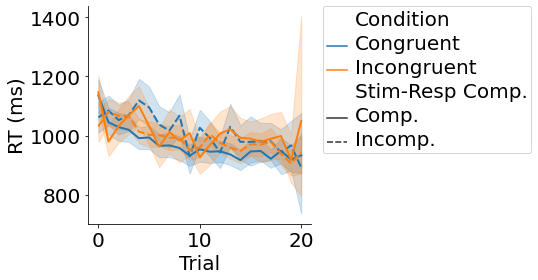

In [33]:
# Supplementary Fig. 1

import seaborn as sns
from statannot import add_stat_annotation
import pickle, json, glob, os
import numpy as np
import pandas as pd


def shownCond2trialByCond(shownCond):
    n0 = 0
    n1 = 0
    n2 = 0
    n3 = 0
    idx = []
    for cond in shownCond:
        if cond == 0:
            idx.append(n0)
            n0 += 1
        elif cond == 1:
            idx.append(n1)
            n1 += 1            
        elif cond == 2:
            idx.append(n2)
            n2 += 1   
        elif cond == 3:
            idx.append(n3)
            n3 += 1
    return idx

def shown_conds2txt(shown_conds):
    out = []
    for cond in shown_conds:
        if cond == 0:
            out.append("Congruent")# high")
        elif cond == 1:
            out.append("Incongruent")# high")
        elif cond == 2:
            out.append("Congruent")# low")
        else:
            out.append("Incongruent")# low")
    return out

def stim2code(stim):
    if "Pinch" in stim:
        return 0
    elif "Clench" in stim:
        return 1
    elif "Poke" in stim:
        return 2
    else:
        return 3
    
def stim_array2code(stim_array):
    stim_list = stim_array
    code_list = [stim2code(stim) for stim in stim_list]
    return np.array(code_list)

def bin2txt(b):
    if b :
        txt = 'Comp.'
    else:
        txt = 'Incomp.'
    return txt

rts = []
affChosen_list = []
trialIdx = []
subjIdx = []
shownCond = []
for path in list(glob.glob('./data/*')):
    for day in range(2):
        try:
            with open(f"{path}/{day+1}/sess6_data_precise_rt_action_manual.json", 'r') as file:
                data = json.load(file)  # Load JSON file
        except Exception as e:
            print(f"Error loading {path}/{day+1}/sess6_data_precise_rt_action_manual.json: {e}")
            continue

        for session in data["sessionInfo"]:  # Assuming sessionInfo is a list in JSON
            shown_conds = session["shownCond"]  # Access shownCond key
            isDone = session["isDone"]  # Access isDone key

            filtered_indices = [i for i in range(len(isDone)) if isDone[i]]

            trialIdx += shownCond2trialByCond([shown_conds[i] for i in filtered_indices])
            shownCond += shown_conds2txt([shown_conds[i] for i in filtered_indices])

            shownStim = stim_array2code(session["shownStim"])  # Convert stim array to code
            selectedMov = session["selectedMov"]  # Extract selected movements
            affChosen = [bin2txt(shownStim[i] == selectedMov[i]) for i in filtered_indices]

            rts += [session["sessionResponses"]["rt"][i] for i in filtered_indices]  # Extract reaction times
            subjIdx += [path] * len(filtered_indices)  # Assign subject index
            affChosen_list += affChosen  
            
d = {'Stim-Resp Comp.': affChosen_list, 'rt': rts, 'trial index': trialIdx, 'Condition': shownCond, 'subject index': subjIdx}
d = pd.DataFrame(data=d)
#d = d.groupby(['subject index', 'congruent action', 'condition', 'trial index'], as_index=False)['rt'].mean()
print(d)
#sns.lineplot(data=d, x="trialIdx", y="rt", hue='shownCond')
o = ["Comp.", "Incomp."]
o_cond = ['congruent high', 
          'incongruent high',
          'congruent low',
          'incongruent low'
         ]
o_cond = ['Congruent', 'Incongruent']
from matplotlib import rcParams
import matplotlib.pylab as plt

rcParams['figure.figsize'] = 4,4

ax = sns.lineplot(data=d, x="trial index", y="rt", style='Stim-Resp Comp.', style_order=o, hue='Condition', hue_order=o_cond, linewidth = 2)

plt.ylabel("RT (ms)", fontsize=20)
plt.xlabel("Trial", fontsize=20)
plt.tick_params(labelsize=20)
#plt.ylim(500, 1400)
sns.despine()

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
plt.setp(ax.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='20') # for legend title

plt.savefig('/Users/YiSangHyun/Downloads/rt_by_trial_by_cond.svg', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

      Stim-Resp Comp.           rt  trial index Condition subject index
0             Incomp.  2155.030848            0      High     ./data/20
1               Comp.  1615.957878            0       Low     ./data/20
2             Incomp.  1852.223055            0       Low     ./data/20
3               Comp.  1319.762144            0      High     ./data/20
4             Incomp.  1090.034595            1       Low     ./data/20
...               ...          ...          ...       ...           ...
17344         Incomp.  1437.190136           19       Low     ./data/14
17345         Incomp.   872.997161           20      High     ./data/14
17346           Comp.   912.357706           20       Low     ./data/14
17347           Comp.  1012.783430           20      High     ./data/14
17348         Incomp.  1246.782263           20       Low     ./data/14

[17349 rows x 5 columns]


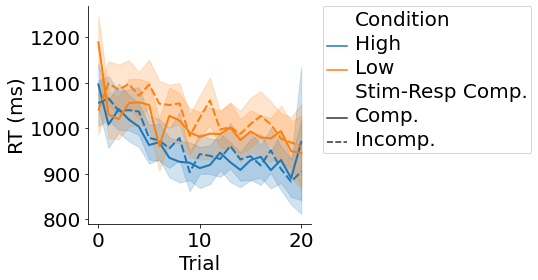

In [34]:
# Supplementary Fig. 1

import seaborn as sns
from statannot import add_stat_annotation
import pickle, json, glob, os
import numpy as np
import pandas as pd


def shownCond2trialByCond(shownCond):
    n0 = 0
    n1 = 0
    n2 = 0
    n3 = 0
    idx = []
    for cond in shownCond:
        if cond == 0:
            idx.append(n0)
            n0 += 1
        elif cond == 1:
            idx.append(n1)
            n1 += 1            
        elif cond == 2:
            idx.append(n2)
            n2 += 1   
        elif cond == 3:
            idx.append(n3)
            n3 += 1
    return idx

def shown_conds2txt(shown_conds):
    out = []
    for cond in shown_conds:
        if cond == 0:
            out.append("High")# high")
        elif cond == 1:
            out.append("High")# high")
        elif cond == 2:
            out.append("Low")# low")
        else:
            out.append("Low")# low")
    return out

def stim2code(stim):
    if "Pinch" in stim:
        return 0
    elif "Clench" in stim:
        return 1
    elif "Poke" in stim:
        return 2
    else:
        return 3
    
def stim_array2code(stim_array):
    stim_list = stim_array
    code_list = [stim2code(stim) for stim in stim_list]
    return np.array(code_list)

def bin2txt(b):
    if b :
        txt = 'Comp.'
    else:
        txt = 'Incomp.'
    return txt

rts = []
affChosen_list = []
trialIdx = []
subjIdx = []
shownCond = []
for path in list(glob.glob('./data/*')):
    for day in range(2):
        try:
            with open(f"{path}/{day+1}/sess6_data_precise_rt_action_manual.json", 'r') as file:
                data = json.load(file)  # Load JSON file
        except Exception as e:
            print(f"Error loading {path}/{day+1}/sess6_data_precise_rt_action_manual.json: {e}")
            continue

        for session in data["sessionInfo"]:  # Assuming sessionInfo is a list in JSON
            shown_conds = session["shownCond"]  # Access shownCond key
            isDone = session["isDone"]  # Access isDone key

            filtered_indices = [i for i in range(len(isDone)) if isDone[i]]

            trialIdx += shownCond2trialByCond([shown_conds[i] for i in filtered_indices])
            shownCond += shown_conds2txt([shown_conds[i] for i in filtered_indices])

            shownStim = stim_array2code(session["shownStim"])  # Convert stim array to code
            selectedMov = session["selectedMov"]  # Extract selected movements
            affChosen = [bin2txt(shownStim[i] == selectedMov[i]) for i in filtered_indices]

            rts += [session["sessionResponses"]["rt"][i] for i in filtered_indices]  # Extract reaction times
            subjIdx += [path] * len(filtered_indices)  # Assign subject index
            affChosen_list += affChosen  
            
d = {'Stim-Resp Comp.': affChosen_list, 'rt': rts, 'trial index': trialIdx, 'Condition': shownCond, 'subject index': subjIdx}
d = pd.DataFrame(data=d)
#d = d.groupby(['subject index', 'congruent action', 'condition', 'trial index'], as_index=False)['rt'].mean()
print(d)
#sns.lineplot(data=d, x="trialIdx", y="rt", hue='shownCond')
o = ["Comp.", "Incomp."]
o_cond = ['congruent high', 
          'incongruent high',
          'congruent low',
          'incongruent low'
         ]
o_cond = ['High', 'Low']
from matplotlib import rcParams
import matplotlib.pylab as plt

rcParams['figure.figsize'] = 4,4

ax = sns.lineplot(data=d, x="trial index", y="rt", style='Stim-Resp Comp.', style_order=o, hue='Condition', hue_order=o_cond, linewidth = 2)

plt.ylabel("RT (ms)", fontsize=20)
plt.xlabel("Trial", fontsize=20)
plt.tick_params(labelsize=20)
#plt.ylim(500, 1400)
sns.despine()

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
plt.setp(ax.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='20') # for legend title

plt.savefig('/Users/YiSangHyun/Downloads/rt_by_trial_by_cond.svg', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

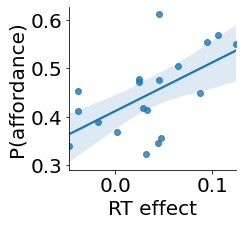

(0.5803318726492653, 0.009187929129024634)


In [45]:
# Fig. 2

import seaborn as sns
from statannot import add_stat_annotation
import pickle, json, glob, os
import numpy as np
import pandas as pd


def shownCond2trialByCond(shownCond):
    n0 = 0
    n1 = 0
    n2 = 0
    n3 = 0
    idx = []
    for cond in shownCond:
        if cond == 0:
            idx.append(n0)
            n0 += 1
        elif cond == 1:
            idx.append(n1)
            n1 += 1            
        elif cond == 2:
            idx.append(n2)
            n2 += 1   
        elif cond == 3:
            idx.append(n3)
            n3 += 1
    return idx

def shown_conds2txt(shown_conds):
    out = []
    for cond in shown_conds:
        if cond == 0:
            out.append("congruent high")
        elif cond == 1:
            out.append("incongruent high")
        elif cond == 2:
            out.append("congruent low")
        else:
            out.append("incongruent low")
    return out

def stim2code(stim):
    if "Pinch" in stim:
        return 0
    elif "Clench" in stim:
        return 1
    elif "Poke" in stim:
        return 2
    else:
        return 3
    
def stim_array2code(stim_array):
    stim_list = stim_array
    code_list = [stim2code(stim) for stim in stim_list]
    return np.array(code_list)

rts = []
affChosen_list = []
trialIdx = []
subjIdx = []
shownCond = []
for path in list(glob.glob('./data/*')):
    for day in range(2):
        try:
            with open(f"{path}/{day+1}/sess6_data_precise_rt_action_manual.json", 'r') as file:
                data = json.load(file)  # Load JSON file
        except Exception as e:
            print(f"Error loading {path}/{day+1}/sess6_data_precise_rt_action_manual.json: {e}")
            continue

        for session in data["sessionInfo"]:  # Assuming sessionInfo is a list in JSON
            shown_conds = session["shownCond"]  # Access shownCond key
            isDone = session["isDone"]  # Access isDone key

            # Get valid trial indices where isDone is True
            valid_indices = [i for i in range(len(isDone)) if isDone[i]]

            trialIdx += shownCond2trialByCond([shown_conds[i] for i in valid_indices])
            shownCond += shown_conds2txt([shown_conds[i] for i in valid_indices])

            shownStim = stim_array2code(session["shownStim"])  # Convert stim array to code
            selectedMov = session["selectedMov"]  # Extract selected movements
            affChosen = [str(shownStim[i] == selectedMov[i]) for i in valid_indices]

            rts += [session["sessionResponses"]["rt"][i] for i in valid_indices]  # Extract reaction times
            subjIdx += [path] * len(valid_indices)  # Assign subject index
            affChosen_list += affChosen  # Append affective choice results
            
d = {'congruent action': affChosen_list, 'rt': rts, 'trial index': trialIdx, 'condition': shownCond, 'subject index': subjIdx}
d = pd.DataFrame(data=d)
d1 = d.groupby(['subject index', 'congruent action'], as_index=False)['rt'].mean()

incong_rt = np.array(d1[d1['congruent action'] == 'False']['rt'])
cong_rt = np.array(d1[d1['congruent action'] == 'True']['rt'])

increase_rt = (incong_rt-cong_rt)/cong_rt

d = {'congruent action': [1 if x=='True' else 0 for x in affChosen_list], 'rt': rts, 'trial index': trialIdx, 'condition': shownCond, 'subject index': subjIdx}
d = pd.DataFrame(data=d)
d2 = d.groupby(['subject index'], as_index=False)['congruent action'].mean()
d2['rt increase'] = increase_rt

sns.regplot(data=d2, x='rt increase', y='congruent action')

from matplotlib import rcParams
import matplotlib.pylab as plt

rcParams['figure.figsize'] = 3,3

plt.xlabel("RT effect", fontsize=20)
plt.ylabel("P(affordance)", fontsize=20)
plt.tick_params(labelsize=20)

sns.despine()

plt.savefig('/Users/YiSangHyun/Downloads/rt_comparison_between_affordance_compatible_incompatible.svg', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

from scipy import stats
print(stats.pearsonr(d2['rt increase'], d2['congruent action']))


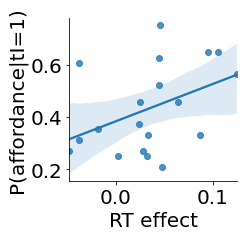

(0.41554882352817907, 0.07682865131295145)


In [46]:
# Supplementary Fig. 2

import seaborn as sns
from statannot import add_stat_annotation
import pickle, json, glob, os
import numpy as np
import pandas as pd


def shownCond2trialByCond(shownCond):
    n0 = 0
    n1 = 0
    n2 = 0
    n3 = 0
    idx = []
    for cond in shownCond:
        if cond == 0:
            idx.append(n0)
            n0 += 1
        elif cond == 1:
            idx.append(n1)
            n1 += 1            
        elif cond == 2:
            idx.append(n2)
            n2 += 1   
        elif cond == 3:
            idx.append(n3)
            n3 += 1
    return idx

def shown_conds2txt(shown_conds):
    out = []
    for cond in shown_conds:
        if cond == 0:
            out.append("congruent high")
        elif cond == 1:
            out.append("incongruent high")
        elif cond == 2:
            out.append("congruent low")
        else:
            out.append("incongruent low")
    return out

def stim2code(stim):
    if "Pinch" in stim:
        return 0
    elif "Clench" in stim:
        return 1
    elif "Poke" in stim:
        return 2
    else:
        return 3
    
def stim_array2code(stim_array):
    stim_list = stim_array
    code_list = [stim2code(stim) for stim in stim_list]
    return np.array(code_list)

rts = []
affChosen_list = []
trialIdx = []
subjIdx = []
shownCond = []
for path in list(glob.glob('./data/*')):
    for day in range(2):
        try:
            with open(f"{path}/{day+1}/sess6_data_precise_rt_action_manual.json", 'r') as file:
                data = json.load(file)  # Load JSON file
        except Exception as e:
            print(f"Error loading {path}/{day+1}/sess6_data_precise_rt_action_manual.json: {e}")
            continue

        for session in data["sessionInfo"]:  # Assuming sessionInfo is a list in JSON
            shown_conds = session["shownCond"]  # Access shownCond key
            isDone = session["isDone"]  # Access isDone key

            # Get valid trial indices where isDone is True
            valid_indices = [i for i in range(len(isDone)) if isDone[i]]

            trialIdx += shownCond2trialByCond([shown_conds[i] for i in valid_indices])
            shownCond += shown_conds2txt([shown_conds[i] for i in valid_indices])

            shownStim = stim_array2code(session["shownStim"])  # Convert stim array to code
            selectedMov = session["selectedMov"]  # Extract selected movements
            affChosen = [str(shownStim[i] == selectedMov[i]) for i in valid_indices]

            rts += [session["sessionResponses"]["rt"][i] for i in valid_indices]  # Extract reaction times
            subjIdx += [path] * len(valid_indices)  # Assign subject index
            affChosen_list += affChosen  # Append affective choice results
            
d = {'congruent action': affChosen_list, 'rt': rts, 'trial index': trialIdx, 'condition': shownCond, 'subject index': subjIdx}
d = pd.DataFrame(data=d)
d1 = d.groupby(['subject index', 'congruent action'], as_index=False)['rt'].mean()

incong_rt = np.array(d1[d1['congruent action'] == 'False']['rt'])
cong_rt = np.array(d1[d1['congruent action'] == 'True']['rt'])

increase_rt = (incong_rt-cong_rt)/cong_rt

d = {'congruent action': [1 if x=='True' else 0 for x in affChosen_list], 'rt': rts, 'trial index': trialIdx, 'condition': shownCond, 'subject index': subjIdx}
d = pd.DataFrame(data=d)
d = d[d['trial index'] == 0]
d2 = d.groupby(['subject index'], as_index=False)['congruent action'].mean()
d2['rt increase'] = increase_rt

sns.regplot(data=d2, x='rt increase', y='congruent action')

from matplotlib import rcParams
import matplotlib.pylab as plt

rcParams['figure.figsize'] = 3,3

plt.xlabel("RT effect", fontsize=20)
plt.ylabel("P(affordance|tI=1)", fontsize=20)
plt.tick_params(labelsize=20)

sns.despine()

plt.savefig('/Users/YiSangHyun/Downloads/rt_comparison_between_affordance_compatible_incompatible.svg', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

from scipy import stats
print(stats.pearsonr(d2['rt increase'], d2['congruent action']))